# Practical Statistics for Data Scientists (Python)

## Chapter 1. Exploratory Data Analysis

> 2020 Peter C. Bruce, Andrew Bruce, Peter Gedeck

Now that we have some basic pandas under our belt, it's time to put them into an analytical workflow that should always begin with Exploratory Data Analysis (EDA).

Use this notebook as you read through chapter 1. in _Practical Statistics_, so you can learn more about the basic statistical analyses that help you "read" your data.

## 1. What's Exploratory Data Analysis (EDA)?

<figure style="float:left;margin-right:2rem;width:500px">
<img style="border:solid black 1px;border-radius:7px;" src="../images/3.5-eda-cheatsheet.jpg">
<figcaption style="font-size:8px">Original image src: <a href="https://towardsdatascience.com/semi-automated-exploratory-data-analysis-eda-in-python-7f96042c9809">Destin Gong</a></figcaption>
</figure>
EDA is essentially the method by which to shore up a birds-eye view of the data. Think of it like scanning a texts main headings to glean what it's about, what may be of interest, and also your first critical sense about what you think may be missing or wrong with it. Some typical goals include:

- Summarize its main characteristics
- Identify potential anomalies, errors, or relationships/patterns aomong variables
- Squash/test some assumptions about data

We will follow some of the common and basic EDA analytical and visualization techniques reviewed in the assigned text (Bruce, Bruce & Gedeck, 2020):

1. Estimates of Location
2. Estimates of Variability
3. Distribution
4. Exploring Binary and Categorical Data Types
5. Correlation
6. Exploring Two or More Variables

## 2. Project Setup

### 2.1 Imports

In [80]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
%pip install wquantiles
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)

pd.options.display.max_rows = 100

Note: you may need to restart the kernel to use updated packages.


### 2.2 Import the Files

Use the following cells to "read" in the files located in the `prac_stats` folder for use in this notebook:

- airline_stats.csv
- kc_tax.csv.gz
- lc_loans.csv
- dfw_airline.csv
- sp500_data.csv.gz
  - (this one takes awhile to upload)
- sp500_sectors.csv
- state.csv

### 2.3 Define paths to data sets

Sometimes it's best to define your paths to data up top, if you have more than a few. It's not too typical to have so many though, since it's mainly for educational/demo purposes.

In [107]:
data_path = './../data/prac-stats/'
AIRLINE_STATS_CSV = data_path+'airline_stats.csv'
KC_TAX_CSV = data_path+'kc_tax.csv.gz'
LC_LOANS_CSV = data_path+'lc_loans.csv'
AIRPORT_DELAYS_CSV = data_path+'dfw_airline.csv'
SP500_DATA_CSV = data_path+'sp500_data_csv'
SP500_SECTORS_CSV = data_path+'sp500_sectors.csv'
STATE_CSV = data_path+'state.csv'

## 3. Estimates of Location

### 3.1 Example: Location Estimates of Population and Murder Rates

In [82]:
# Table 1-2
df_state = pd.read_csv(STATE_CSV)
df_state.head(10)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [83]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


Notice how there are lots of missign values: of the total 20389 rows, the evictions' columns only have 5080 values.

Let's first examine this to better understand it.

In [84]:
# Look at some null evictions
df_ny_state_city_evictions = pd.read_csv("./../data/02-python/ny_cities_eviction.csv")
df_ny_state_city_evictions.loc[df_ny_state_city_evictions['evictions'].isna()][['year','name','evictions']].head()

,year,name,evictions
0,2000,Accord,NaN
1,2001,Accord,NaN
2,2002,Accord,NaN
3,2003,Accord,NaN
4,2004,Accord,NaN


In [85]:
# Look at some NOT null evictions
df_ny_state_city_evictions.loc[df_ny_state_city_evictions['evictions'].notna()][['year','name','evictions']].head()

,year,name,evictions
24,2007,Adams,0.54
25,2008,Adams,0.00
26,2009,Adams,0.00
27,2010,Adams,2.70
28,2011,Adams,0.00


Compute the mean, trimmed mean, and median for Population. For `mean` and `median` we can use the _pandas_ methods of the data frame. The trimmed mean requires the `trim_mean` function in _scipy.stats_.

In [86]:
df_ny_state_city_evictions['population'].mean()

14140.95593220339

In [87]:
trim_mean(df_ny_state_city_evictions['population'], 0.1)

5454.040213326794

In [88]:
df_ny_state_city_evictions['population'].median()

2270.0

Weighted mean is available with numpy. For weighted median, we can use the specialised package `wquantiles` (https://pypi.org/project/wquantiles/).

In [89]:
df_ny_state_city_evictions['poverty-rate'].mean()

8.03435593220339

In [90]:
print(np.average(df_ny_state_city_evictions['poverty-rate'], weights=df_ny_state_city_evictions['population']))

nan


In [91]:
print(wquantiles.median(df_state['Murder.Rate'], weights=df_state['Population']))

4.4


## 4. Estimates of Variability

In [92]:
# Table 1-2
df_state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


In [93]:
df_state.sample(5)

,State,Population,Murder.Rate,Abbreviation
16,Kentucky,4339367,3.6,KY
11,Idaho,1567582,2.0,ID
14,Iowa,3046355,1.9,IA
25,Montana,989415,3.6,MT
28,New Hampshire,1316470,0.9,NH


### 3.1 Standard deviation

In [94]:
df_state['Population'].std()

6848235.347401142

Interquartile range is calculated as the difference of the 75% and 25% quantile.

In [95]:
print(df_state['Population'].quantile(0.75) - df_state['Population'].quantile(0.25))

4847308.0


Median absolute deviation from the median can be calculated with a method in _statsmodels_

In [96]:
print(robust.scale.mad(df_state['Population']))
print(abs(df_state['Population'] - df_state['Population'].median()).median() / 0.6744897501960817)

3849876.1459979336
3849876.1459979336


### 3.2 Percentiles and Boxplots

_Pandas_ has the `quantile` method for data frames. 

A quantile is a specific way to define a ranking system for a data set as a means to examine its distribution of values. In other words, is a particular value above or below a set limit. You have probably interacted with quantile bins before, such as a doctor's visit that uses percentiles (1-100) to see where you land in the land of your physical height for instance. There's also quartiles (quarter of a hundred) or deciles (tenths of a hundred).

Let's see how it helps us understand the `state` data set.

In [97]:
print(df_state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


The below corresponds with Table 1.4, which 

In [98]:
# Table 1.4
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(df_state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


As we have learned from previous notebook lessons, _Pandas_ provides a number of basic exploratory plots. Here's a boxplot, which can help people see a 'birds eye view' of the distribution of data. 

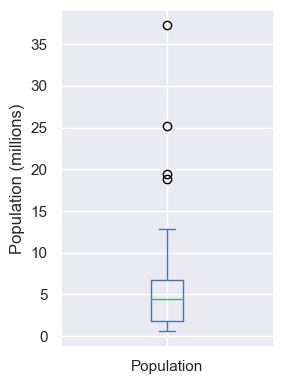

In [99]:
ax = (df_state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

## 5. Data Distributions

### 5.1 Frequency Table and Histograms

The `cut` method for _pandas_ data splits the dataset into bins. There are a number of arguments for the method. The following code creates equal sized bins. The method `value_counts` returns a frequency table.

In [100]:
binnedPopulation = pd.cut(df_state['Population'], 10)
print(binnedPopulation.value_counts())

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64


In [101]:
# Table 1.5
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([df_state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

_Pandas_ also supports histograms for exploratory data analysis.

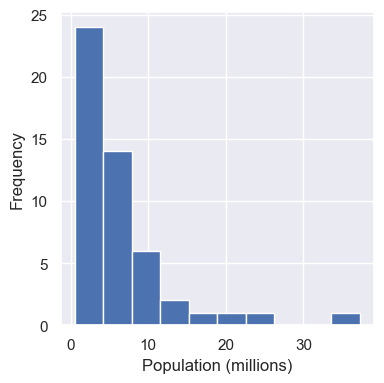

In [102]:
ax = (df_state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

### 5.2 Density Estimates

Density is an alternative to histograms that can provide more insight into the distribution of the data points. Use the argument `bw_method` to control the smoothness of the density curve.

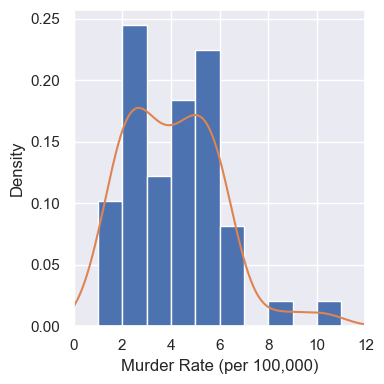

In [103]:
ax = df_state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
df_state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()

## 6. Exploring Binary and Categorical Data

In [104]:
# Table 1-6
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


_Pandas_ also supports bar charts for displaying a single categorical variable.

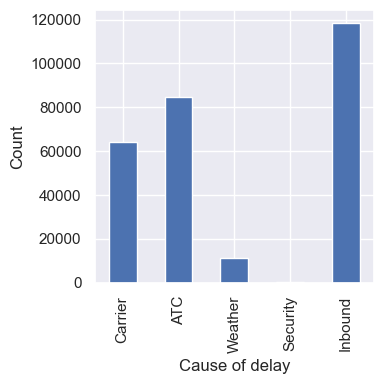

In [105]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

### Correlation

First read the required datasets

In [108]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: './../data/prac-stats/sp500_data_csv'

In [ ]:
# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

KeyError: "None of [Index(['T', 'CTL', 'FTR', 'VZ', 'LVLT'], dtype='object')] are in the [columns]"

Next we focus on funds traded on major exchanges (sector == 'etf'). 

In [ ]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

Due to the large number of columns in this table, looking at the correlation matrix is cumbersome and it's more convenient to plot the correlation as a heatmap. The _seaborn_ package provides a convenient implementation for heatmaps.

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

The above heatmap works when you have color. For the greyscale images, as used in the book, we need to visualize the direction as well. The following code shows the strength of the correlation using ellipses.

In [ ]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

m = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

### Scatterplots
Simple scatterplots are supported by _pandas_. Specifying the marker as `$\u25EF$` uses an open circle for each point.

In [ ]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

In [ ]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$', alpha=0.5)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
print(ax.axvline(0, color='grey', lw=1))

## 7. Exploring Two or More Variables

Load the kc_tax dataset and filter based on a variety of criteria

In [ ]:
kc_tax = pd.read_csv(KC_TAX_CSV)
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


### 7.1 Hexagonal binning and Contours

#### Plotting numeric versus numeric data

If the number of data points gets large, scatter plots will no longer be meaningful. Here methods that visualize densities are more useful. The `hexbin` method for _pandas_ data frames is one powerful approach.

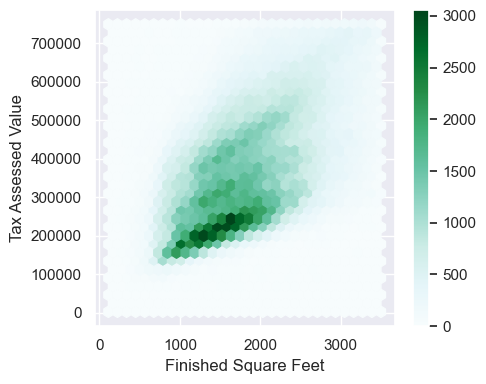

In [ ]:
ax = kc_tax0.plot.hexbin(
    x='SqFtTotLiving', 
    y='TaxAssessedValue',
    gridsize=30, 
    sharex=False, 
    figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

The _seaborn_ kdeplot is a two-dimensional extension of the density plot. The calculation of the 2D-density for the full dataset takes several minutes. It is sufficient to create the visualization with a smaller sample of the dataset. With 10,000 data points, creating the graph takes only seconds. While some details may be lost, the overall shape is preserved. 

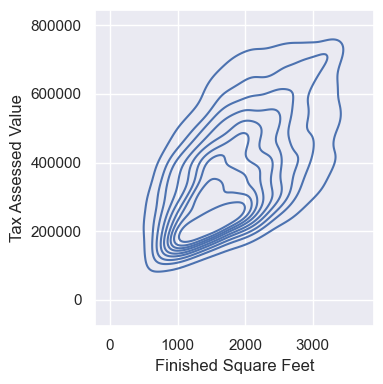

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

### 7.2 Two Categorical Variables

Load the `lc_loans` dataset

In [ ]:
lc_loans = pd.read_csv(LC_LOANS_CSV)

In [ ]:
# Table 1-8(1)
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [ ]:
# Table 1-8(2)
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


### 7.3 Categorical and Numeric Data

_Pandas_ boxplots of a column can be grouped by a different column.

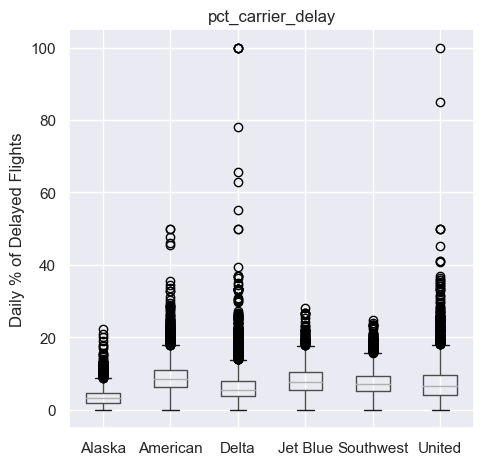

In [ ]:
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats.head()
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

_Pandas_ also supports a variation of boxplots called _violinplot_. 

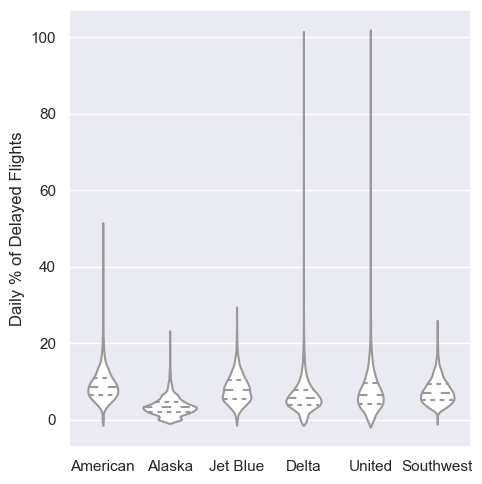

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

### 7.4 Visualizing Multiple Variables

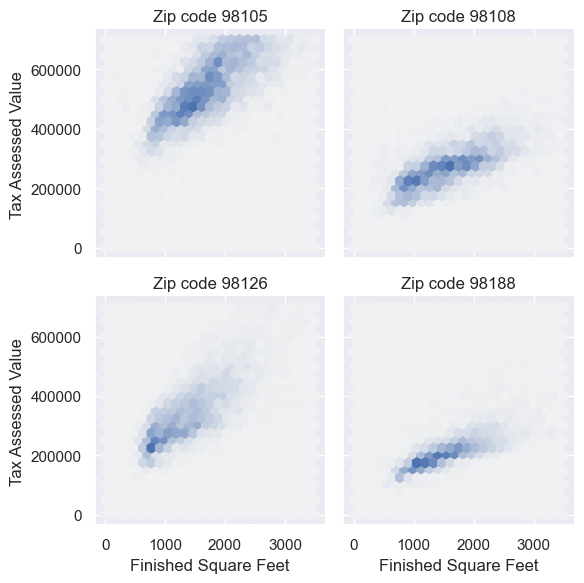

In [ ]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()